**Advanced Python Project**

**Part-1 (Web-Scraping from Worldmeters website)**

**Introduction to the Dataset**

The webpage https://www.worldometers.info/world-population/population-by-country/ contains the data of both countries and dependent territories based on the latest United Nations Population Division estimates.

Attributes in this data:

1.**Country(or dependency)** - Name of the country

2.**Population (2020)** - Population of the country in given year

3.**Yearly Change** - Change in population since last year

4.**Net Change**- Anual changes in population (Resulting from births and deaths

5.**Density (P/Km²)** - Urbanization and Population Density

6.**Land Area (Km²)** - The area of Land in Square kilometers

7.**Migrants (net)**- Number of migrants

8.**Fert. Rate**- Fertility rate (in %)

9.**Med. Age**- Median age of the population

10.**Urban Pop %** - % of the population is living in an Urban area

11.**World Share** - The share of the world's population (in %)

We are going to scrape population data from this website.

**Scraping the data using BeautifulSoup**

**Importing libraries**

We are importing the following libraries:

1.**'Pandas'** - For Data manipulation and analysis

2.**'Numpy'** - For analysis

3.**'Matplotlib'**- For Data visualization

4.**'Seaborn'** - For Data visualization

5.**'requests'** - To get the HTML code of webpage in Python.

6.**'Beautiful soup'** - To parse structured data in order to make it more accessible and convenient to study.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup

In [3]:
# URL of the webpage
URL = 'https://www.worldometers.info/world-population/population-by-country/'

page = requests.get(URL)

# To print the text present in the webpage
print(page.text)


<!DOCTYPE html><!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=device-width, initial-scale=1"> <title>Population by Country (2022) - Worldometer</title><meta name="description" content="List of countries and dependencies in the world ranked by population, from the most populated. Growth rate, median age, fertility rate, area, density, population density, urbanization, urban population, share of world population."><link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon"><link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png"><link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png"><link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png"><link rel="apple-touch-icon" s

The above output is just similar to what we see in the webpage through **'inspect option'**. So, our primary job of getting HTML code here is done. But, we can see that the output contains a lot of HTML and other codes included. This is difficult to read and understand. So, we need to **parse this code** using Python in order to make it more convenient. Now, this can be done by **beautifulsoup**.

In [4]:
# creating Beautiful soup object named "Soup". 
# html.parser is used because the content is in HTML format.

soup = BeautifulSoup(page.content,'html.parser')

Since, we want to **scrape the table**, we need to find the specific section for table in the HTML code.

In [5]:
# using this method we are finding table from the HTML code and assigning it to a variable named "req_table"
req_table = soup.find("table")

# To print text present inside the required table
print(req_table.text)

   # Country (or dependency) Population (2020) Yearly Change Net Change Density (P/Km²) Land Area (Km²) Migrants (net) Fert. Rate Med. Age Urban Pop % World Share     1 Honduras 9,904,607 1.63 % 158,490 89 111,890 -6,800 2.5 24 57 % 0.13 %   2 United Arab Emirates 9,890,402 1.23 % 119,873 118 83,600 40,000 1.4 33 86 % 0.13 %   3 Djibouti 988,000 1.48 % 14,440 43 23,180 900 2.8 27 79 % 0.01 %   4 Saint Barthelemy 9,877 0.30 % 30 470 21   N.A. N.A. 0 % 0.00 %   5 Seychelles 98,347 0.62 % 608 214 460 -200 2.5 34 56 % 0.00 %   6 Antigua and Barbuda 97,929 0.84 % 811 223 440 0 2.0 34 26 % 0.00 %   7 Vietnam 97,338,579 0.91 % 876,473 314 310,070 -80,000 2.1 32 38 % 1.25 %   8 Hungary 9,660,351 -0.25 % -24,328 107 90,530 6,000 1.5 43 72 % 0.12 %   9 Tajikistan 9,537,645 2.32 % 216,627 68 139,960 -20,000 3.6 22 27 % 0.12 %   10 Belarus 9,449,323 -0.03 % -3,088 47 202,910 8,730 1.7 40 79 % 0.12 %   11 Austria 9,006,398 0.57 % 51,296 109 82,409 65,000 1.5 43 57 % 0.12 %   12 Fiji 896,445 0.73 % 

In an HTML Table:

1.Row is encoded as **tr tag**

2.A data cell is encoded as **td tag**

3.Header cell is encoded as **th tag**

In [6]:
# we are first creating an empty list named 'column_names'.

column_names = []

# We are now finding all the header cells in table using 'th tag' 
# Here, we are ignoring the first column that has serial_numbers as we can anyway get them in the dataframe.
# That's why we are using index slicer [1:]

for i in req_table.find_all('th')[1:]:
    title = i.text.strip()
    # To append all the obtained titles to column_names list
    column_names.append(title)

We are creating a dataframe named **"population_of_countries"** and assigning the above created list to it as column titles.

In [7]:
population_of_countries = pd.DataFrame(columns = column_names)
population_of_countries

# Below is the outline of our dataframe.

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share


In [8]:
# using find_all method with 'tr tag', we are getting all the rows of table and assigning it to variable "all_rows"
# We are ignoring the first row that has column names in it.
# That's why we are using index slicer [1:]

all_rows= req_table.find_all('tr')[1:]

for row in all_rows:
  data = row.find_all('td')
  row_data = [td.text.strip() for td in data][1:]
  length = len(population_of_countries)
  # we are assigning values to the dataframe
  # we are using loc( ) function to extract data values using index label.
  population_of_countries.loc[length] = row_data            
population_of_countries

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,"9,904,607",1.63 %,"158,490",89,"111,890","-6,800",2.5,24,57 %,0.13 %
1,United Arab Emirates,"9,890,402",1.23 %,"119,873",118,"83,600","40,000",1.4,33,86 %,0.13 %
2,Djibouti,"988,000",1.48 %,"14,440",43,"23,180",900,2.8,27,79 %,0.01 %
3,Saint Barthelemy,"9,877",0.30 %,30,470,21,,N.A.,N.A.,0 %,0.00 %
4,Seychelles,"98,347",0.62 %,608,214,460,-200,2.5,34,56 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Jordan,"10,203,134",1.00 %,"101,440",115,"88,780","10,220",2.8,24,91 %,0.13 %
231,Portugal,"10,196,709",-0.29 %,"-29,478",111,"91,590","-6,000",1.3,46,66 %,0.13 %
232,Azerbaijan,"10,139,177",0.91 %,"91,459",123,"82,658","1,200",2.1,32,56 %,0.13 %
233,Sweden,"10,099,265",0.63 %,"62,886",25,"410,340","40,000",1.9,41,88 %,0.13 %


**Thus, finally we have scraped the table from webpage using python library called "Beautiful Soup" and prepared a dataframe.**

#**Basic data cleaning steps**#

**1. To find Number of Rows and Columns present in table**

In [9]:
# In pandas , we have a function called 'info()' to get basic outline of the dataframe.

population_of_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    object
 2   Yearly Change            235 non-null    object
 3   Net Change               235 non-null    object
 4   Density (P/Km²)          235 non-null    object
 5   Land Area (Km²)          235 non-null    object
 6   Migrants (net)           235 non-null    object
 7   Fert. Rate               235 non-null    object
 8   Med. Age                 235 non-null    object
 9   Urban Pop %              235 non-null    object
 10  World Share              235 non-null    object
dtypes: object(11)
memory usage: 22.0+ KB


Thus, we have 11 columns and 235 rows/records.

2. To find if there is any missing value in the dataset
Before checking for the missing values, we first need to correct datatypes of variables as all are given "Object datatype" only.

There are 10 numerical variables and 1 nominal variable here.

1.**Country (or dependency)** - Nominal level of measurement (OBJECT)

2.**Population (2020)** - Continuous scale (FLOAT)

3.**Yearly Change** - Continuous scale (FLOAT)

4.**Net Change** - Continuous scale (FLOAT)

5.**Density (P/Km²)** - Continuous scale (FLOAT)

6.**Land Area (Km²)** - Continuous scale (FLOAT)

7.**Migrants (net)** - Continuous scale (FLOAT)

8.**Fert. Rate** - Continuous scale (FLOAT)

9.**Med. Age** - Continuous scale (FLOAT)

10.**Urban Pop %** - Continuous scale (FLOAT)

**World Share** - Continuous scale (FLOAT)

Yearly Change, Urban Pop and World Share have '%' sign, we need to replace that. Otherwise, it will not be considered as a numerical measure.

There are few special characters like ',' in data. We need to replace them with empty string.

We are also replacing empty blanks and 'N.A.' with "Nan"

In [10]:
# since regex expression is use, we say regex=True
population_of_countries = population_of_countries.replace('\%', '',regex=True)
population_of_countries = population_of_countries.replace('\,', '', regex = True)
# We are using nan from numpy library
population_of_countries = population_of_countries.replace('', np.nan)
population_of_countries = population_of_countries.replace('N.A.', np.nan)

In [11]:
# to check the transformed dataframe.

population_of_countries.head(5)


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Honduras,9904607,1.63,158490,89,111890,-6800,2.5,24,57,0.13
1,United Arab Emirates,9890402,1.23,119873,118,83600,40000,1.4,33,86,0.13
2,Djibouti,988000,1.48,14440,43,23180,900,2.8,27,79,0.01
3,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0,0.00
4,Seychelles,98347,0.62,608,214,460,-200,2.5,34,56,0.00


In [12]:
# To convert variables from object to float. 

columns = ['Population (2020)','Yearly Change','Net Change','Density (P/Km²)','Land Area (Km²)',
           'Migrants (net)','Fert. Rate','Med. Age','Urban Pop %','World Share']

# Since it's difficult to change the datatype of each variable, we are using a 'for loop'
for i in columns :
  population_of_countries[i] = population_of_countries[i].astype(float)

# To check if they are changed
population_of_countries.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    float64
 2   Yearly Change            235 non-null    float64
 3   Net Change               235 non-null    float64
 4   Density (P/Km²)          235 non-null    float64
 5   Land Area (Km²)          235 non-null    float64
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               201 non-null    float64
 8   Med. Age                 201 non-null    float64
 9   Urban Pop %              221 non-null    float64
 10  World Share              235 non-null    float64
dtypes: float64(10), object(1)
memory usage: 22.0+ KB


In [13]:
# To get total number of missing values 

population_of_countries.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                14
World Share                 0
dtype: int64

Hence, there are missing values present in **Migrants, Fert.Rate ,Med. Age and Urban Pop %**

**3. To rename columns appropriately**

In [14]:
population_of_countries = population_of_countries.rename(columns = {
      'Country (or dependency)' : 'Country', 
      'Population (2020)' : 'Population', 
      'Density (P/Km²)' : 'Density', 
      'Land Area (Km²)' : 'Land Area',
      'Migrants (net)' : 'Migrants',
      'Urban Pop %' : 'Urban Population', 
      'Fert. Rate' : 'Fertility Rate',
      'Med. Age' : 'Median Age'})

# To get the column names after renaming.
population_of_countries.columns

Index(['Country', 'Population', 'Yearly Change', 'Net Change', 'Density',
       'Land Area', 'Migrants', 'Fertility Rate', 'Median Age',
       'Urban Population', 'World Share'],
      dtype='object')

**4. To report top 10 and bottom 10 countries based on density column**

**a. Bottom 10 countries**

In [15]:
# We are using sort_values method to arrange data in ascending order based on Density column.
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Density'], ascending = True).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
234,India,0.0,-100.00,-1.366418e+09,0.0,2973190.0,-532687.0,2.2,28.0,NaN,0.00
60,Greenland,56770.0,0.17,9.800000e+01,0.0,410450.0,NaN,NaN,NaN,87.0,0.00
113,Falkland Islands,3480.0,3.05,1.030000e+02,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
123,Mongolia,3278290.0,1.65,5.312300e+04,2.0,1553560.0,-852.0,2.9,28.0,67.0,0.04
52,Western Sahara,597339.0,2.55,1.487600e+04,2.0,266000.0,5582.0,2.4,28.0,87.0,0.01
115,Iceland,341243.0,0.65,2.212000e+03,3.0,100250.0,380.0,1.8,37.0,94.0,0.00
149,Australia,25499884.0,1.18,2.966860e+05,3.0,7682300.0,158246.0,1.8,38.0,86.0,0.33
150,Namibia,2540905.0,1.86,4.637500e+04,3.0,823290.0,-4806.0,3.4,22.0,55.0,0.03
154,Botswana,2351627.0,2.08,4.793000e+04,4.0,566730.0,3000.0,2.9,24.0,73.0,0.03
108,Canada,37742154.0,0.89,3.311070e+05,4.0,9093510.0,242032.0,1.5,41.0,81.0,0.48


**Greenland** has the least population density (0 people per Km²)

**b. Top 10 countries**

In [16]:
# We are using sort_values method to arrange data in descending order based on Density column.
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Density'], ascending = False).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
102,Monaco,39242.0,0.71,278.0,26337.0,1.0,NaN,NaN,NaN,NaN,0.00
43,Macao,649335.0,1.39,8890.0,21645.0,30.0,5000.0,1.2,39.0,NaN,0.01
56,Singapore,5850342.0,0.79,46005.0,8358.0,700.0,27028.0,1.2,42.0,NaN,0.08
29,Hong Kong,7496981.0,0.82,60827.0,7140.0,1050.0,29308.0,1.3,45.0,NaN,0.10
117,Gibraltar,33691.0,-0.03,-10.0,3369.0,10.0,NaN,NaN,NaN,NaN,0.00
182,Bahrain,1701575.0,3.68,60403.0,2239.0,760.0,47800.0,2.0,32.0,89.0,0.02
24,Holy See,801.0,0.25,2.0,2003.0,0.0,NaN,NaN,NaN,NaN,0.00
69,Maldives,540544.0,1.81,9591.0,1802.0,300.0,11370.0,1.9,30.0,35.0,0.01
87,Malta,441543.0,0.27,1171.0,1380.0,320.0,900.0,1.5,43.0,93.0,0.01
186,Bangladesh,164689383.0,1.01,1643222.0,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11


**Monaco** has the highest population density **(26337 people per Km²)**

**5. To find country with highest and lowest fertility rates. Reporting top 10 and bottom 10 countries**

**a. 10 Coutries with lowest Fertility rate**

In [17]:
# We are using sort_values method to arrange data in ascending order based on Fertility Rate.
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Fertility Rate'], ascending = True).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
72,South Korea,51269185.0,0.09,43877.0,527.0,97230.0,11731.0,1.1,44.0,82.0,0.66
153,Taiwan,23816775.0,0.18,42899.0,673.0,35410.0,30001.0,1.2,42.0,79.0,0.31
43,Macao,649335.0,1.39,8890.0,21645.0,30.0,5000.0,1.2,39.0,NaN,0.01
137,Puerto Rico,2860853.0,-2.47,-72555.0,323.0,8870.0,-97986.0,1.2,44.0,NaN,0.04
56,Singapore,5850342.0,0.79,46005.0,8358.0,700.0,27028.0,1.2,42.0,NaN,0.08
96,Moldova,4033963.0,-0.23,-9300.0,123.0,32850.0,-1387.0,1.3,38.0,43.0,0.05
206,Cyprus,1207359.0,0.73,8784.0,131.0,9240.0,5000.0,1.3,37.0,67.0,0.02
83,Spain,46754778.0,0.04,18002.0,94.0,498800.0,40000.0,1.3,45.0,80.0,0.60
122,Bosnia and Herzegovina,3280819.0,-0.61,-20181.0,64.0,51000.0,-21585.0,1.3,43.0,52.0,0.04
231,Portugal,10196709.0,-0.29,-29478.0,111.0,91590.0,-6000.0,1.3,46.0,66.0,0.13


Thus, **South Korea** has lowest fertility Rate of 1.1

**(The average number of babies born to females in South Korea during their reproductive years is 1.1)**



**b. 10 Coutries with highest Fertility rate :**

In [18]:
# We are using sort_values method to arrange data in descending order based on Fertility Rate.
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Fertility Rate'], ascending = False).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
151,Niger,24206644.0,3.84,895929.0,19.0,1266700.0,4000.0,7.0,15.0,17.0,0.31
190,Somalia,15893222.0,2.92,450317.0,25.0,627340.0,-40000.0,6.1,17.0,47.0,0.20
12,DR Congo,89561403.0,3.19,2770836.0,40.0,2267050.0,23861.0,6.0,17.0,46.0,1.15
165,Mali,20250833.0,3.02,592802.0,17.0,1220190.0,-40000.0,5.9,16.0,44.0,0.26
187,Chad,16425864.0,3.00,478988.0,13.0,1259200.0,2000.0,5.8,17.0,23.0,0.21
121,Angola,32866272.0,3.27,1040977.0,26.0,1246700.0,6413.0,5.6,17.0,67.0,0.42
208,Burundi,11890784.0,3.12,360204.0,463.0,25680.0,2001.0,5.5,17.0,14.0,0.15
164,Nigeria,206139589.0,2.58,5175990.0,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
152,Gambia,2416668.0,2.94,68962.0,239.0,10120.0,-3087.0,5.3,18.0,59.0,0.03
161,Burkina Faso,20903273.0,2.86,581895.0,76.0,273600.0,-25000.0,5.2,18.0,31.0,0.27


**Niger** has the highest Fertility Rate of 7

**(The average number of babies born to females in Niger during their reproductive years is 7)**

**6. Top 5 largest countries in the world based on land area**

In [19]:
# We are using sort_values method to arrange data in descending order based on Land area.
# to retrieve first 5 rows, used head(5) 

population_of_countries.sort_values(by = ['Land Area'], ascending = False).head(5)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
193,Russia,1.459345e+08,0.04,62206.0,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87
194,China,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
119,United States,3.310027e+08,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
108,Canada,3.774215e+07,0.89,331107.0,4.0,9093510.0,242032.0,1.5,41.0,81.0,0.48
160,Brazil,2.125594e+08,0.72,1509890.0,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73


**7. Top 5 countries in world based on median value**

In [20]:
# We are using sort_values method to arrange data in descending order based on Median age.
# to retrieve first 5 rows, used head(5) 

population_of_countries.sort_values(by = ['Median Age'], ascending = False).head(5)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
204,Japan,126476461.0,-0.30,-383840.0,347.0,364555.0,71560.0,1.4,48.0,92.0,1.62
109,Martinique,375265.0,-0.08,-289.0,354.0,1060.0,-960.0,1.9,47.0,92.0,0.00
49,Italy,60461826.0,-0.15,-88249.0,206.0,294140.0,148943.0,1.3,47.0,69.0,0.78
231,Portugal,10196709.0,-0.29,-29478.0,111.0,91590.0,-6000.0,1.3,46.0,66.0,0.13
228,Greece,10423054.0,-0.48,-50401.0,81.0,128900.0,-16000.0,1.3,46.0,85.0,0.13


The 5 countries in the world where average life span of people is highest are

Japan (average lifespan of 48 years)

Italy (average lifespan of 47 years)

Martinique(average lifespan of 47 years)

Germany (average lifespan of 46 years)

Greece (average lifespan of 46 years)

**8. Appropriate graphs to examine the distribution of Population, median age,urban population and yearly change**

**a. Distribution of Population:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


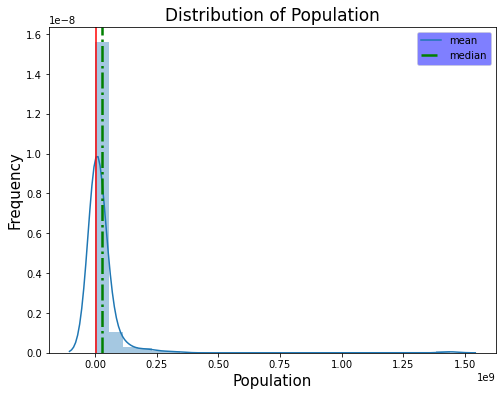

In [21]:
# We are plotting a Distribution plot using seaborn library to know the distribution of Population

plt.figure(figsize=(8,6))
sns.distplot(population_of_countries['Population'],bins = 25)
mean1 =population_of_countries['Population'].mean()
median1 =population_of_countries['Population'].median()

# We are finding mean and median values and fixing them on the graph.

plt.axvline(x=mean1,ls='-.',lw=2.5,color='Green',label="mean") 
plt.axvline(x=median1,color='Red',label="median")
 
plt.title('Distribution of Population',fontsize=17)
plt.xlabel("Population",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

# adding legend to the plot for clear understanding of mean and median
plt.legend(["mean","median"],loc=1,framealpha=0.5,facecolor='b')
plt.show()

Since Mean > Median, we can say that Population distribution is positively skewed.

Since most of the data is distributed on the left side, leaving a long right tail, we can say that population is positively skewed in nature.

There are outliers present above the upper whiskers.

**b. Distribution of Median Age:**

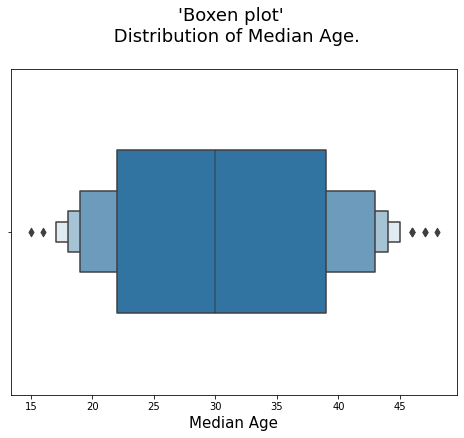

In [22]:
# We are plotting a Boxen plot using seaborn library to know the distribution of Median Age
# It is an enhanced Box plot that gives more detailed information about the distribution.

plt.figure(figsize=(8,6))
plt.title("'Boxen plot' \n Distribution of Median Age.\n",fontsize = 18)
sns.boxenplot(x = population_of_countries["Median Age"],width=0.5)
plt.xlabel("Median Age",fontsize=15)
sns.set_palette("Pastel1")
plt.show()

Since most of the data is distributed on the left side, leaving a long right tail, we can say that median age is positively skewed in nature.

There are outliers present both above and below the whiskers.

In [23]:
skewness_coefficient = round(population_of_countries["Median Age"].skew(),3)

print(f"Coefficient of skewness of Median Age is {skewness_coefficient}")

Coefficient of skewness of Median Age is 0.108


Since skewness coefficient is greater than 0, we can say that distribution is positively skewed. This supports our graphical interpretation through Boxen plot.

**c. Urban Population distribution:**

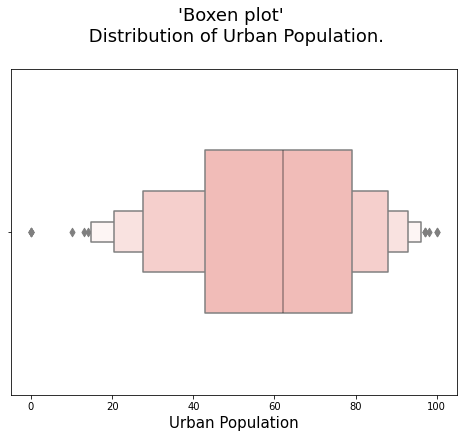

In [24]:
# We are plotting a Boxen plot using seaborn library to know the distribution of Urban Population. 
# It is an enhanced Box plot that gives more detailed information about the distribution.

plt.figure(figsize=(8,6))
plt.title("'Boxen plot' \n Distribution of Urban Population.\n",fontsize = 18)
sns.boxenplot(x = population_of_countries["Urban Population"],width=0.5)
plt.xlabel("Urban Population",fontsize=15)
sns.set_palette("jet_r")
plt.show()

Since most of the data is distributed on the right side, leaving a long left tail, we can say that yearly change is negatively skewed in nature.

There are outliers present both above and below the whiskers.

In [25]:
skewness_coefficient = round(population_of_countries["Urban Population"].skew(),3)

print(f"Coefficient of skewness of Urban population is {skewness_coefficient}")

Coefficient of skewness of Urban population is -0.375


Since skewness coefficient is less than 0, we can say that distribution is negatively skewed. This supports our graphical interpretation through Boxen plot.

9. Sorting population column based on lowest populated countries and reporting bottom 10 countries as well as top 10 countries.
a. 10 Lowest populated countries

In [27]:
# We are using sort_values method to arrange data in ascending order based on Population
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Population'], ascending = True).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
234,India,0.0,-100.00,-1.366418e+09,0.0,2973190.0,-532687.0,2.2,28.0,NaN,0.0
24,Holy See,801.0,0.25,2.000000e+00,2003.0,0.0,NaN,NaN,NaN,NaN,0.0
197,Tokelau,1357.0,1.27,1.700000e+01,136.0,10.0,NaN,NaN,NaN,0.0,0.0
189,Niue,1626.0,0.68,1.100000e+01,6.0,260.0,NaN,NaN,NaN,46.0,0.0
113,Falkland Islands,3480.0,3.05,1.030000e+02,0.0,12170.0,NaN,NaN,NaN,66.0,0.0
78,Montserrat,4992.0,0.06,3.000000e+00,50.0,100.0,NaN,NaN,NaN,10.0,0.0
57,Saint Pierre & Miquelon,5794.0,-0.48,-2.800000e+01,25.0,230.0,NaN,NaN,NaN,100.0,0.0
48,Saint Helena,6077.0,0.30,1.800000e+01,16.0,390.0,NaN,NaN,NaN,27.0,0.0
3,Saint Barthelemy,9877.0,0.30,3.000000e+01,470.0,21.0,NaN,NaN,NaN,0.0,0.0
223,Nauru,10824.0,0.63,6.800000e+01,541.0,20.0,NaN,NaN,NaN,NaN,0.0


The country with the lowest population of **801 people** is **Holy See.**

**b. 10 Highest populated countries**

In [28]:
# We are using sort_values method to arrange data in descending order based on Population
# to retrieve first 10 rows, used head(10) 

population_of_countries.sort_values(by = ['Population'], ascending = False).head(10)

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants,Fertility Rate,Median Age,Urban Population,World Share
194,China,1.439324e+09,0.39,5540090.0,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
119,United States,3.310027e+08,0.59,1937734.0,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
142,Indonesia,2.735236e+08,1.07,2898047.0,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
156,Pakistan,2.208923e+08,2.00,4327022.0,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
160,Brazil,2.125594e+08,0.72,1509890.0,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73
164,Nigeria,2.061396e+08,2.58,5175990.0,226.0,910770.0,-60000.0,5.4,18.0,52.0,2.64
186,Bangladesh,1.646894e+08,1.01,1643222.0,1265.0,130170.0,-369501.0,2.1,28.0,39.0,2.11
193,Russia,1.459345e+08,0.04,62206.0,9.0,16376870.0,182456.0,1.8,40.0,74.0,1.87
202,Mexico,1.289328e+08,1.06,1357224.0,66.0,1943950.0,-60000.0,2.1,29.0,84.0,1.65
204,Japan,1.264765e+08,-0.30,-383840.0,347.0,364555.0,71560.0,1.4,48.0,92.0,1.62


The country with the highest population of **approximately one billion four hundred thirty-nine million (1,439,323,776) people is China.**

The second highly populated country is **India**

Part-2 (Creating class with given arguments and methods)
1.**Standard** -

A.Attributes: Std name, No of enrolled students, Overall GPA

B.Methods: getStd, getEnrolled, getOGPA

2.**Students class** with Standard as its super class -

A.Attributes: Name,Roll No., Standard, Math marks, English Marks, Science Marks, Social Marks

B.Methods: getName, getRollNo, getStd, getGPA

3.**Explanation:**

A.getName, getRollNo, getStd methods should give the name, roll number and standard of the student.

B.getGPA should give the average marks of math,english, science and social marks scaled to 10-points. Same applies for all the attributes and methods in the Standard superclass.

In [29]:
class Standard(object):

  # Inititlization of the object
  # Self is the implicit object

  def __init__(self, Std_name, No_of_enrolled_students , overall_gpa):
     self.Std_name = Std_name
     self.No_of_enrolled_students = No_of_enrolled_students 
     self.overall_gpa = overall_gpa
     

  def __str__(self):
     print("Standard of the student : ", self.Std_name)
     print("The number of enrolled students : ", self.No_of_enrolled_students )
     print("Overall GPA is  ", self.overall_gpa)
     return ""


  # Method1 (Getter method):
  def getStd(self):
     print(self.Std_name)

  # Method2 (Getter method):
  def getEnrolled(self):
     print(self.No_of_enrolled_students)

  # Method3 (Getter method):
  def getOGPA(self):
     print(self.overall_gpa)


In [30]:
class Students (Standard):
  def __init__(self, Name, Roll_No, Std_name):
     self.Name = Name
     self.Roll_No = Roll_No
     self.Std_name=Std_name
     self.Math_Marks = 0.0
     self.English_Marks= 0.0
     self.Science_Marks = 0.0
     self.Social_Marks = 0.0
     self.GPA = None

  def __str__(self):
     print("Student name : ", self.Name)
     print("Roll number of student : ", self.Roll_No)
     print("Std_name : ", self.Std_name)
     print("Maths marks : ", self.Math_Marks)
     print("English marks : " , self.English_Marks)
     print("Science marks : " , self.Science_Marks)
     print("Social marks : " , self.Social_Marks)
     return ""

  # Method1 (Getter Method):
  def getName(self):
     print(self.Name)

  # Method2 (Getter Method):
  def getRoll_No(self):
     print(self.Roll_No)

  # Method3 (setter Method):
  def setMathsMarks(self,marks):
     self.Math_Marks = marks

  # Method4 (Setter Method):
  def setEnglishMarks(self,marks):
     self.English_Marks = marks

  # Method5 (Setter Method):
  def setScienceMarks(self,marks):
     self.Science_Marks = marks

  # Method6 (Setter Method):
  def setSocialMarks(self,marks):
     self.Social_Marks = marks

  # Method7 (Getter Method):
  def getMathmarks(self):
     print(self.Math_Marks)

  # Method8 (Getter Method):
  def getEnglishmarks(self):
     print(self.English_Marks) 

  # Method9 (Getter Method):
  def getSciencemarks(self):
     print(self.Science_Marks)

  # Method10 (Getter Method):
  def getSocialmarks(self):
     print(self.Social_Marks) 

  # Method11 (Getter Method):
  def getGPA(self):
     return (self.Math_Marks+ self.English_Marks+ self.Science_Marks+ self.Social_Marks)/4

In [34]:
x= Standard("Second Standard", 20, 9.3 )

In [35]:
print(x)

Standard of the student :  Second Standard
The number of enrolled students :  20
Overall GPA is   9.3



In [ ]:
x.getStd()

In [37]:
x.getEnrolled()

20


In [38]:
x.getOGPA()

9.3


In [39]:
y=Students("ABC", 123,"First Standard")

In [40]:
print(y)

Student name :  ABC
Roll number of student :  123
Std_name :  First Standard
Maths marks :  0.0
English marks :  0.0
Science marks :  0.0
Social marks :  0.0



In [41]:
# set marks 

y.setMathsMarks(8)
y.setEnglishMarks(10)
y.setScienceMarks(8)
y.setSocialMarks(7.5)

In [42]:
# to check if marks got updated
print(y)

Student name :  ABC
Roll number of student :  123
Std_name :  First Standard
Maths marks :  8
English marks :  10
Science marks :  8
Social marks :  7.5



In [43]:
# This is a method inherited from parent class. we did not mention it in the students class.

y.getStd()

First Standard


In [44]:
# This is a method present only in "Students Class"
y.getGPA()

8.375